In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [153]:
df= pd.read_csv(r'C:\Users\Dell\Downloads\Ex1_data.csv')

In [154]:
df.head()

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,Albania,78.025,1.603775,11658.905520,93.39,21.7,1.48
1,Algeria,76.090,3.933496,12015.640530,93.41,25.7,0.31
2,Angola,59.398,1.135044,7337.569901,54.32,6.5,3.25
3,Argentina,76.068,4.301914,20105.198990,98.97,28.0,3.39
4,Armenia,74.467,1.825292,9969.664854,99.55,20.2,0.49


In [155]:
df.isnull().sum()

Country                                   0
Life Expectancy (Year)                    0
CO2 emissions (Billion tons)              0
GDP per capita ($)                        0
Rate of using basic drinking water (%)    0
Obesity among adults (%)                  0
Beer consumption per capita (Liter)       0
dtype: int64

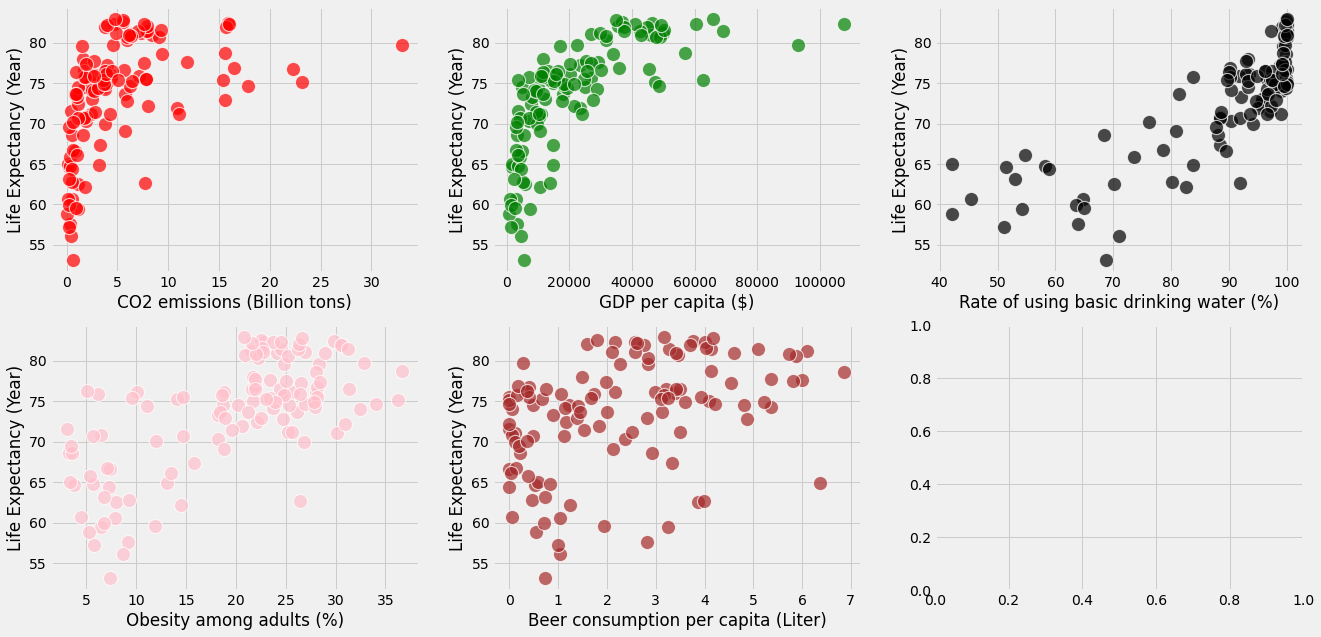

In [156]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.scatterplot(ax=axes[0, 0], data=df, x='CO2 emissions (Billion tons)', y='Life Expectancy (Year)', s=200, alpha=0.7,color='red')
sns.scatterplot(ax=axes[0, 1], data=df, x='GDP per capita ($)', y='Life Expectancy (Year)', s=200, alpha=0.7, color='green')
sns.scatterplot(ax=axes[0, 2], data=df, x='Rate of using basic drinking water (%)', y='Life Expectancy (Year)', s=200, alpha=0.7, color='black')
sns.scatterplot(ax=axes[1, 0], data=df, x='Obesity among adults (%)', y='Life Expectancy (Year)', s=200, alpha=0.7, color='pink')
sns.scatterplot(ax=axes[1, 1], data=df, x='Beer consumption per capita (Liter)', y='Life Expectancy (Year)', s=200, alpha=0.7, color='brown');

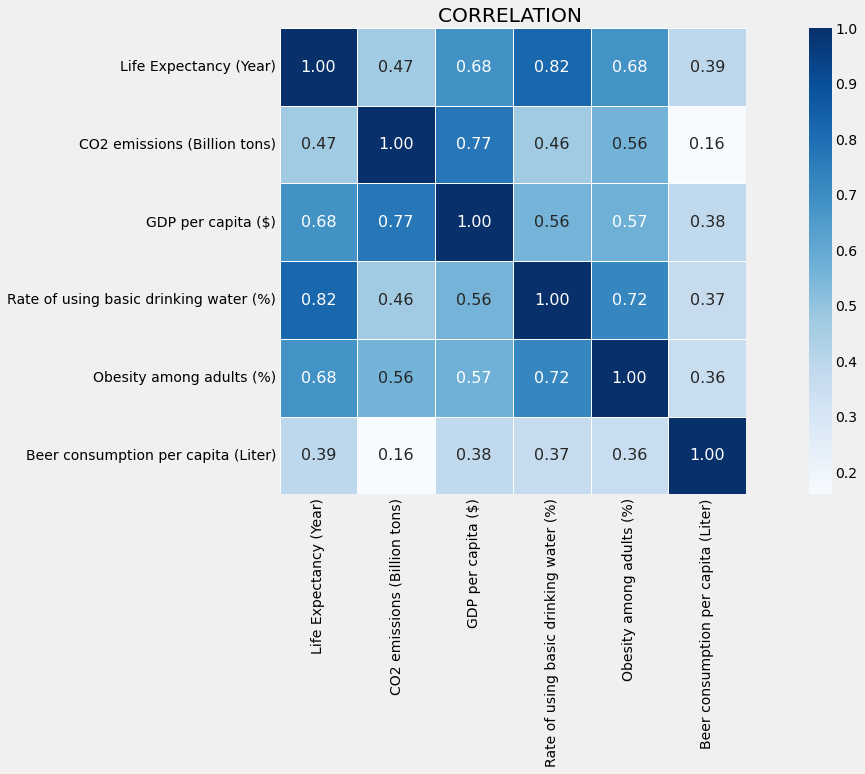

In [141]:
plt.figure(figsize=(20,8))
plt.title('CORRELATION ')
corr1= df.corr()
sns.heatmap(corr1, square= True, annot= True, fmt= '.2f', annot_kws= {'size':16}, cmap='Blues', linecolor='white', linewidths=0.5);

In [157]:
data= df.drop(['Country'], axis='columns')
df1= data.values

In [158]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x= st.fit_transform(df1)
data_scaled= pd.DataFrame(x, columns=data.columns)
data_scaled

,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,0.677593,-6.378973e-01,-0.509815,0.253168,0.250001,-0.434512
1,0.398667,-2.069419e-01,-0.491520,0.254522,0.702963,-1.086901
2,-2.007444,-7.246039e-01,-0.731434,-2.392025,-1.471254,0.552435
3,0.395496,-1.387914e-01,-0.076649,0.630955,0.963416,0.630499
4,0.164715,-5.969207e-01,-0.596448,0.670224,0.080141,-0.986534
...,...,...,...,...,...,...
115,0.583032,-5.745800e-01,-0.070886,0.641788,1.008713,-0.161289
116,0.299205,-1.695673e-11,-0.925605,-0.000045,-1.122968,0.552951
117,-0.081056,1.690562e-01,-0.197759,0.345245,0.589723,1.461319
118,-1.046268,-7.380767e-01,-0.918104,-2.362235,-0.678571,-1.243028


In [159]:
data_scaled= data_scaled.values

In [160]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

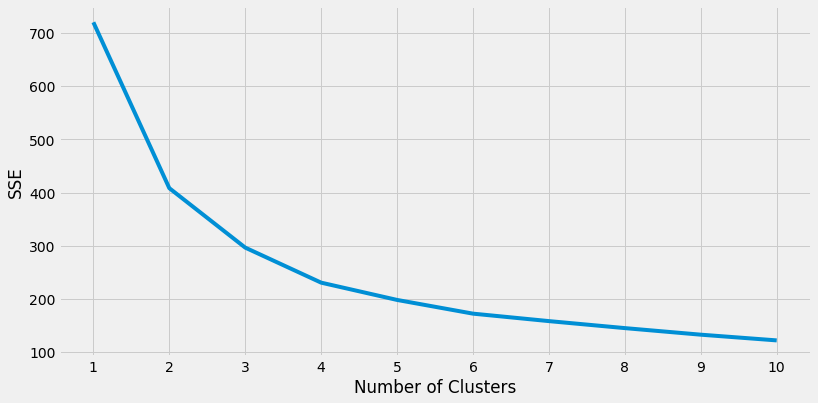

In [161]:
k_war= {
'init':'random',
'n_init': 10,
'max_iter': 300,
'random_state': 42
}

sse= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, **k_war)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE");

In [162]:
kneed= KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
kneed.elbow

3

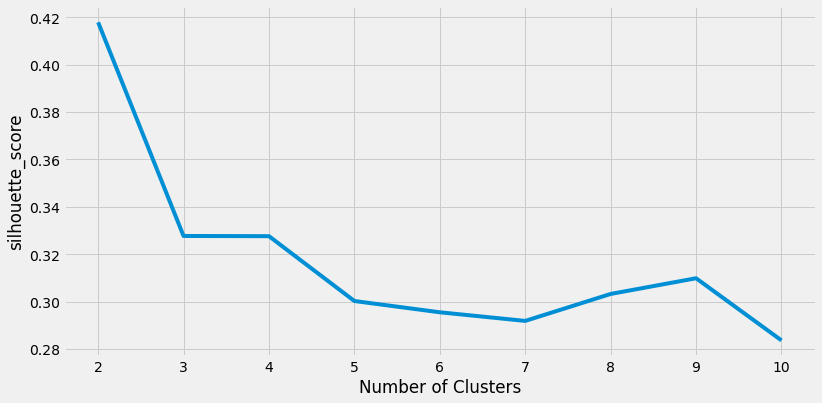

In [163]:
silhouette= []
for i in range(2,11):
    kmeans= KMeans(n_clusters=i, **k_war)
    kmeans.fit(data_scaled)
    silhouette_sc= silhouette_score(data_scaled, kmeans.labels_)
    silhouette.append(silhouette_sc)

plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(range(2,11), silhouette)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_score");

In [164]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)

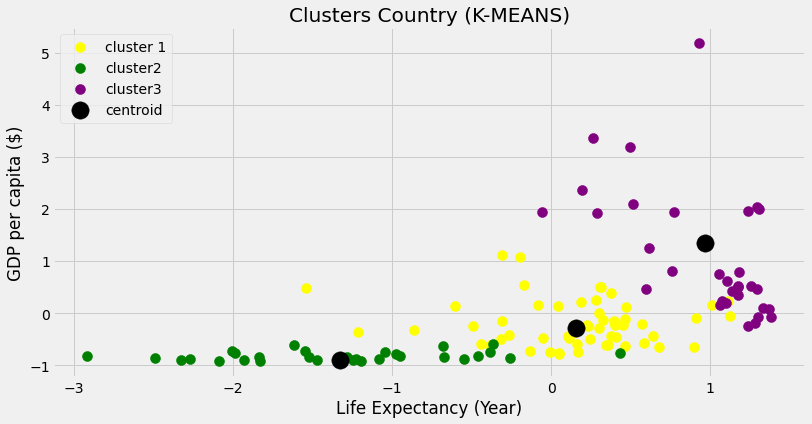

In [165]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_kmeans==0,0], data_scaled[y_kmeans==0,1], s=100, c='yellow', label='cluster 1')
plt.scatter(data_scaled[y_kmeans==1,0], data_scaled[y_kmeans==1,1], s=100, c='green', label='cluster2')
plt.scatter(data_scaled[y_kmeans==2,0], data_scaled[y_kmeans==2,1], s=100, c='purple', label='cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=300, c='black', label='centroid')
plt.title('Clusters Country (K-MEANS)')
plt.xlabel('Life Expectancy (Year)')
plt.ylabel('GDP per capita ($)')
plt.legend()
plt.show()

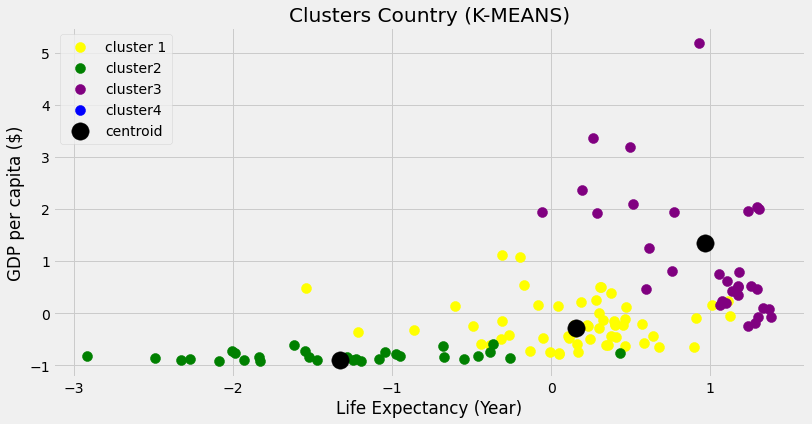

In [151]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_kmeans==0,0], data_scaled[y_kmeans==0,1], s=100, c='yellow', label='cluster 1')
plt.scatter(data_scaled[y_kmeans==1,0], data_scaled[y_kmeans==1,1], s=100, c='green', label='cluster2')
plt.scatter(data_scaled[y_kmeans==2,0], data_scaled[y_kmeans==2,1], s=100, c='purple', label='cluster3')
plt.scatter(data_scaled[y_kmeans==3,0], data_scaled[y_kmeans==3,1], s=100, c='blue', label='cluster4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], s=300, c='black', label='centroid')
plt.title('Clusters Country (K-MEANS)')
plt.xlabel('Life Expectancy (Year)')
plt.ylabel('GDP per capita ($)')
plt.legend()
plt.show()

In [166]:
df['class']= kmeans.labels_
df

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter),class
0,Albania,78.025,1.603775,11658.905520,93.39,21.70000,1.480000,0
1,Algeria,76.090,3.933496,12015.640530,93.41,25.70000,0.310000,0
2,Angola,59.398,1.135044,7337.569901,54.32,6.50000,3.250000,1
3,Argentina,76.068,4.301914,20105.198990,98.97,28.00000,3.390000,0
4,Armenia,74.467,1.825292,9969.664854,99.55,20.20000,0.490000,0
...,...,...,...,...,...,...,...,...
115,Uruguay,77.369,1.946065,20217.560440,99.13,28.40000,1.970000,0
116,Vietnam,75.400,5.052212,3551.438810,89.65,9.57563,3.250924,0
117,Venezuela,72.762,5.966121,17743.684000,94.75,24.70000,4.880000,0
118,Yemen,66.066,1.062211,3697.704000,54.76,13.50000,0.030000,1


In [167]:
df.head()

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter),class
0,Albania,78.025,1.603775,11658.905520,93.39,21.7,1.48,0
1,Algeria,76.090,3.933496,12015.640530,93.41,25.7,0.31,0
2,Angola,59.398,1.135044,7337.569901,54.32,6.5,3.25,1
3,Argentina,76.068,4.301914,20105.198990,98.97,28.0,3.39,0
4,Armenia,74.467,1.825292,9969.664854,99.55,20.2,0.49,0


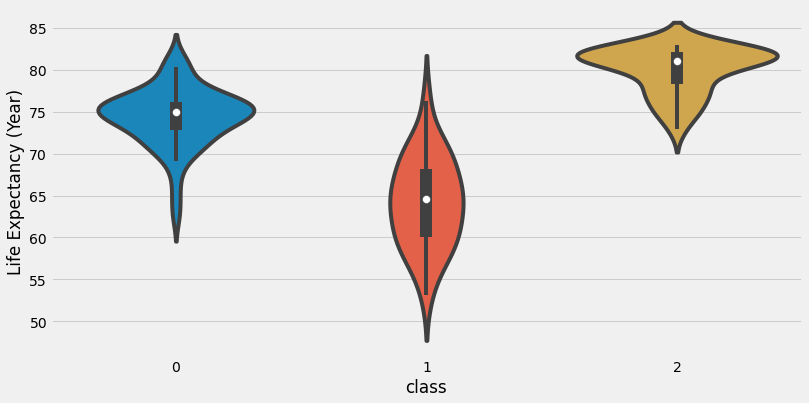

In [168]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.violinplot(data=df, x='class', y='Life Expectancy (Year)');

In [169]:
import plotly.express as px
fig = px.scatter(df, x = 'CO2 emissions (Billion tons)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)', color = 'class', title='Correlations between CO2 emissions and life expectancy across different income groups')
fig.show()

In [170]:
import plotly.express as px
fig = px.scatter(df, x = 'Rate of using basic drinking water (%)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)' , color = 'class',title='Correlations between Rate of using basic drinking water (%) and life expectancy across different income groups')
fig.show()

In [172]:
import plotly.express as px
fig = px.scatter(df, x = 'Obesity among adults (%)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)' , color = 'class',title='Correlations between Obesity among adults (%) and life expectancy across different income groups')
fig.show()

In [171]:
import plotly.express as px
fig = px.scatter(df, x = 'Beer consumption per capita (Liter)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)' , color = 'class',title='Correlations between Beer consumption per capita (Liter) and life expectancy across different income groups')
fig.show()

In [110]:
import plotly.express as px
fig = px.choropleth(df, locations="Country", locationmode='country names', color='class', hover_name="Country", color_continuous_scale="tealrose")
fig.update_layout(title_text = 'Life Expectancy by Country(K-MEANS)', title_x = 0.5)
fig.show()


# Hierarchical Clustering

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [112]:
df= pd.read_csv(r'C:\Users\Dell\Downloads\Ex1_data.csv')
df

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,Albania,78.025,1.603775,11658.905520,93.39,21.70000,1.480000
1,Algeria,76.090,3.933496,12015.640530,93.41,25.70000,0.310000
2,Angola,59.398,1.135044,7337.569901,54.32,6.50000,3.250000
3,Argentina,76.068,4.301914,20105.198990,98.97,28.00000,3.390000
4,Armenia,74.467,1.825292,9969.664854,99.55,20.20000,0.490000
...,...,...,...,...,...,...,...
115,Uruguay,77.369,1.946065,20217.560440,99.13,28.40000,1.970000
116,Vietnam,75.400,5.052212,3551.438810,89.65,9.57563,3.250924
117,Venezuela,72.762,5.966121,17743.684000,94.75,24.70000,4.880000
118,Yemen,66.066,1.062211,3697.704000,54.76,13.50000,0.030000


In [113]:
data= df.drop(['Country'], axis='columns')
df1= data.values

In [114]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x= st.fit_transform(df1)
data_scaled= pd.DataFrame(x, columns=data.columns)
data_scaled

,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,0.677593,-6.378973e-01,-0.509815,0.253168,0.250001,-0.434512
1,0.398667,-2.069419e-01,-0.491520,0.254522,0.702963,-1.086901
2,-2.007444,-7.246039e-01,-0.731434,-2.392025,-1.471254,0.552435
3,0.395496,-1.387914e-01,-0.076649,0.630955,0.963416,0.630499
4,0.164715,-5.969207e-01,-0.596448,0.670224,0.080141,-0.986534
...,...,...,...,...,...,...
115,0.583032,-5.745800e-01,-0.070886,0.641788,1.008713,-0.161289
116,0.299205,-1.695673e-11,-0.925605,-0.000045,-1.122968,0.552951
117,-0.081056,1.690562e-01,-0.197759,0.345245,0.589723,1.461319
118,-1.046268,-7.380767e-01,-0.918104,-2.362235,-0.678571,-1.243028


In [115]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

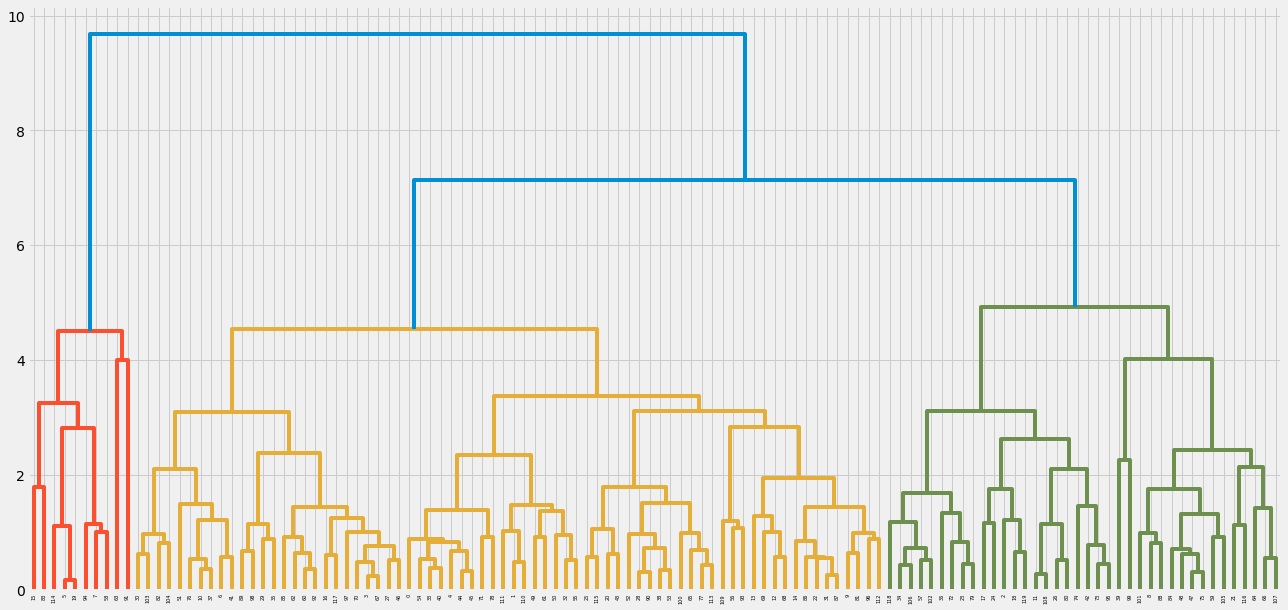

In [116]:
plt.figure(figsize = (20,10))
mergings = sch.linkage(data_scaled, method="complete", metric='euclidean')
sch.dendrogram(mergings)
plt.show()

In [117]:
agg= AgglomerativeClustering(n_clusters=3, linkage='ward',affinity='euclidean')
agg.fit_predict(data_scaled)

array([2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 0, 1, 1], dtype=int64)

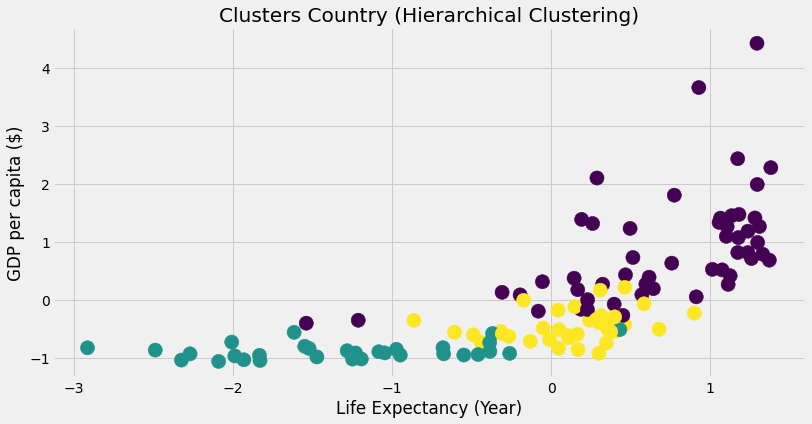

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled['Life Expectancy (Year)'], data_scaled['GDP per capita ($)'], c=agg.labels_, s=200);
plt.title('Clusters Country (Hierarchical Clustering)')
plt.xlabel('Life Expectancy (Year)')
plt.ylabel('GDP per capita ($)')
plt.show()

In [119]:
df['class']= agg.labels_
df

,Country,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter),class
0,Albania,78.025,1.603775,11658.905520,93.39,21.70000,1.480000,2
1,Algeria,76.090,3.933496,12015.640530,93.41,25.70000,0.310000,2
2,Angola,59.398,1.135044,7337.569901,54.32,6.50000,3.250000,1
3,Argentina,76.068,4.301914,20105.198990,98.97,28.00000,3.390000,0
4,Armenia,74.467,1.825292,9969.664854,99.55,20.20000,0.490000,2
...,...,...,...,...,...,...,...,...
115,Uruguay,77.369,1.946065,20217.560440,99.13,28.40000,1.970000,2
116,Vietnam,75.400,5.052212,3551.438810,89.65,9.57563,3.250924,2
117,Venezuela,72.762,5.966121,17743.684000,94.75,24.70000,4.880000,0
118,Yemen,66.066,1.062211,3697.704000,54.76,13.50000,0.030000,1


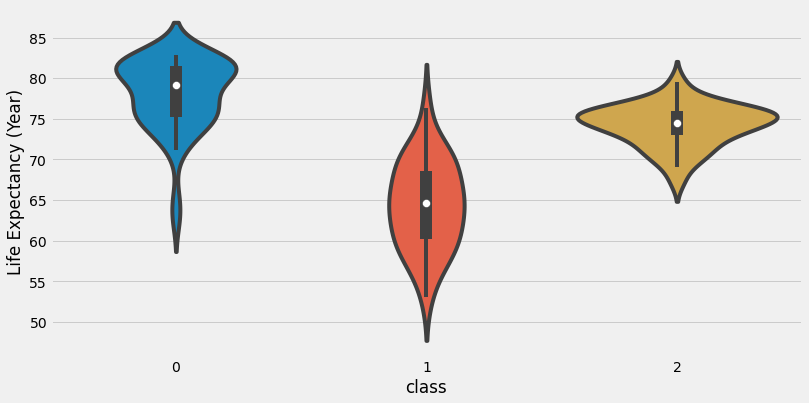

In [120]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.violinplot(data=df, x='class', y='Life Expectancy (Year)');

In [121]:
import plotly.express as px
fig = px.scatter(df, x = 'CO2 emissions (Billion tons)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)' , color = 'class')
fig.show()

In [122]:
import plotly.express as px
fig = px.choropleth(df, locations="Country", locationmode='country names', color='class', hover_name="Country", color_continuous_scale="tealrose")
fig.update_layout(title_text = 'Life Expectancy by Country(Hierarchical Clustering)', title_x = 0.5)
fig.show()

# Probabilistic Clustering

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import norm

In [124]:
df= pd.read_csv(r'C:\Users\Dell\Downloads\Ex1_data.csv')

In [125]:
data= df.drop(['Country'], axis='columns')
df1= data.values

In [126]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x= st.fit_transform(df1)
data_scaled= pd.DataFrame(x, columns=data.columns)
data_scaled

,Life Expectancy (Year),CO2 emissions (Billion tons),GDP per capita ($),Rate of using basic drinking water (%),Obesity among adults (%),Beer consumption per capita (Liter)
0,0.677593,-6.378973e-01,-0.509815,0.253168,0.250001,-0.434512
1,0.398667,-2.069419e-01,-0.491520,0.254522,0.702963,-1.086901
2,-2.007444,-7.246039e-01,-0.731434,-2.392025,-1.471254,0.552435
3,0.395496,-1.387914e-01,-0.076649,0.630955,0.963416,0.630499
4,0.164715,-5.969207e-01,-0.596448,0.670224,0.080141,-0.986534
...,...,...,...,...,...,...
115,0.583032,-5.745800e-01,-0.070886,0.641788,1.008713,-0.161289
116,0.299205,-1.695673e-11,-0.925605,-0.000045,-1.122968,0.552951
117,-0.081056,1.690562e-01,-0.197759,0.345245,0.589723,1.461319
118,-1.046268,-7.380767e-01,-0.918104,-2.362235,-0.678571,-1.243028


In [127]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data_scaled)

#predictions from gmm
labels = gmm.predict(data_scaled)
df['cluster'] = labels

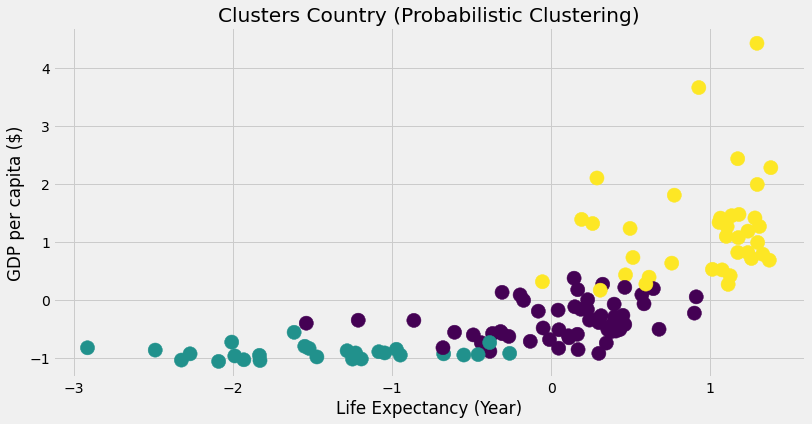

In [128]:
plt.figure(figsize=(12,6))
plt.scatter(data_scaled['Life Expectancy (Year)'], data_scaled['GDP per capita ($)'], c=df.cluster, s=200);
plt.title('Clusters Country (Probabilistic Clustering)')
plt.xlabel('Life Expectancy (Year)')
plt.ylabel('GDP per capita ($)')
plt.show()

In [129]:
import plotly.express as px
fig = px.choropleth(df, locations="Country", locationmode='country names', color='cluster', hover_name="Country", color_continuous_scale="tealrose")
fig.update_layout(title_text = 'Life Expectancy by Country(Probabilistic Clustering)', title_x = 0.5)
fig.show()

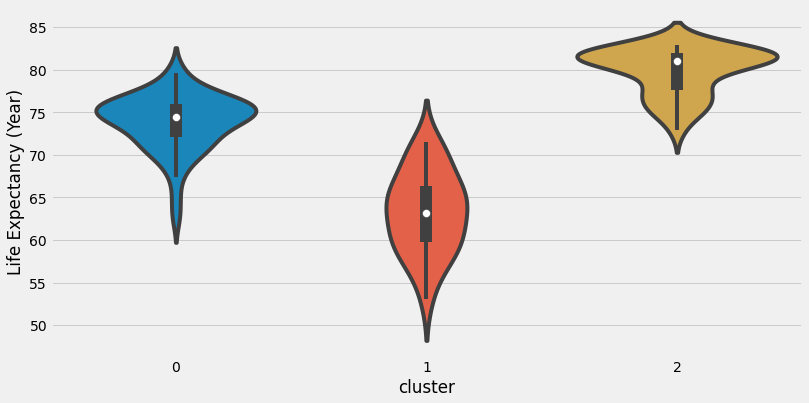

In [130]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.violinplot(data=df, x='cluster', y='Life Expectancy (Year)');

In [131]:
import plotly.express as px
fig = px.scatter(df, x = 'CO2 emissions (Billion tons)', y ='Life Expectancy (Year)',
                    size ='GDP per capita ($)' , color = 'cluster')
fig.show()